<a href="https://colab.research.google.com/github/TungPT-user/Predicting_customer_satisfaction/blob/main/predicting_customer_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Lib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Khảo sát dữ liệu

In [ ]:
url_csv = 'https://drive.google.com/file/d/16Y3H5QUPIjxltsNLJQrKJXT6gH2LJ9n9/view?usp=sharing'    # Link Gdrive được cung cấp ở slide bài giảng
file_id_csv = url_csv.split('/')[-2]                                                  # Split link trên để lấy id của file csv
gdrive_url_csv = 'https://drive.google.com/uc?id=' + file_id_csv                      # Dùng format link từ google và id đã trích xuất được ở trên
df_csv = pd.read_csv(gdrive_url_csv, encoding='gb18030')
df_csv.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df = df_csv

In [ ]:
df.shape

(103904, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

* Nhìn vào ta thấy, cột Arrival Delay in Minutes có gía trị null
* cột Unnamed: 0 cần được xóa

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop(columns=('Unnamed: 0'))
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df = df.rename(columns=
 {  'id': 'id',
    'Gender': 'gender',
    'Customer Type': 'customer_type',
    'Age': 'age',
    'Type of Travel': 'type_of_travel',
    'Class': 'class',
    'Flight Distance': 'flight_distance',
    'Inflight wifi service': 'inflight_wifi_service',
    'Departure/Arrival time convenient': 'departure_arrival_time_convenient',
    'Ease of Online booking': 'ease_of_online_booking',
    'Gate location': 'gate_location',
    'Food and drink': 'food_and_drink',
    'Online boarding': 'online_boarding',
    'Seat comfort': 'seat_comfort',
    'Inflight entertainment': 'inflight_entertainment',
    'On-board service': 'on_board_service',
    'Leg room service': 'leg_room_service',
    'Baggage handling': 'baggage_handling',
    'Checkin service': 'checkin_service',
    'Inflight service': 'inflight_service',
    'Cleanliness': 'cleanliness',
    'Departure Delay in Minutes': 'departure_delay_in_minutes',
    'Arrival Delay in Minutes': 'arrival_delay_in_minutes',
    'satisfaction': 'satisfaction'
  })

In [ ]:
mode_val = df['arrival_delay_in_minutes'].mode()[0]

df['arrival_delay_in_minutes'] = df['arrival_delay_in_minutes'].fillna(mode_val)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   gender                             103904 non-null  object 
 2   customer_type                      103904 non-null  object 
 3   age                                103904 non-null  int64  
 4   type_of_travel                     103904 non-null  object 
 5   class                              103904 non-null  object 
 6   flight_distance                    103904 non-null  int64  
 7   inflight_wifi_service              103904 non-null  int64  
 8   departure_arrival_time_convenient  103904 non-null  int64  
 9   ease_of_online_booking             103904 non-null  int64  
 10  gate_location                      103904 non-null  int64  
 11  food_and_drink                     1039

In [ ]:
df.head()

In [ ]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f'title: {col} -------- số giá trị bên trong cột: {len(unique_vals)}')
    print(f'{col}: {unique_vals.tolist()} \n')

title: id -------- số giá trị bên trong cột: 103904
id: [70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83502, 95789, 100580, 71142, 127461, 70354, 66246, 39076, 22434, 43510, 114090, 105420, 102956, 18510, 14925, 118319, 75460, 48492, 27809, 70594, 30089, 58779, 79659, 110293, 48014, 96517, 64685, 64138, 60373, 14849, 28319, 103012, 124114, 107794, 81983, 53164, 82042, 72127, 113046, 1050, 54886, 125918, 7467, 78972, 126625, 114501, 114813, 32167, 68001, 117052, 8661, 57165, 78610, 51058, 92027, 115534, 9261, 61033, 75930, 112142, 24518, 112524, 101639, 85018, 106922, 32564, 92242, 73302, 42267, 121358, 65655, 88062, 91330, 22031, 27921, 51947, 40017, 76392, 118486, 6012, 30183, 41652, 15138, 123589, 114534, 93076, 96963, 85494, 72989, 42357, 23040, 65420, 65045, 37373, 44405, 16653, 71655, 77591, 4585, 108347, 23400, 31010, 57513, 20979, 95841, 114684, 111667, 20101, 63212, 8256, 56161, 121196, 23788, 129579, 127516, 18012, 45561, 5228, 1

* Các cột features categories: gender, customer_type, type_of_travel, class, inflight_wifi_service, departure/arrival_time_convenient, ease_of_online_booking, gate_location, food_and_drink, online_boarding, seat_comfort, inflight_entertainment, on_board_service, leg_room_service, baggage_handling, checkin_service, inflight_service, cleanliness, satisfaction

* Các cột features liên tục: age, flight_distance, departure_delay_in_minutes, arrival_delay_in_minutes

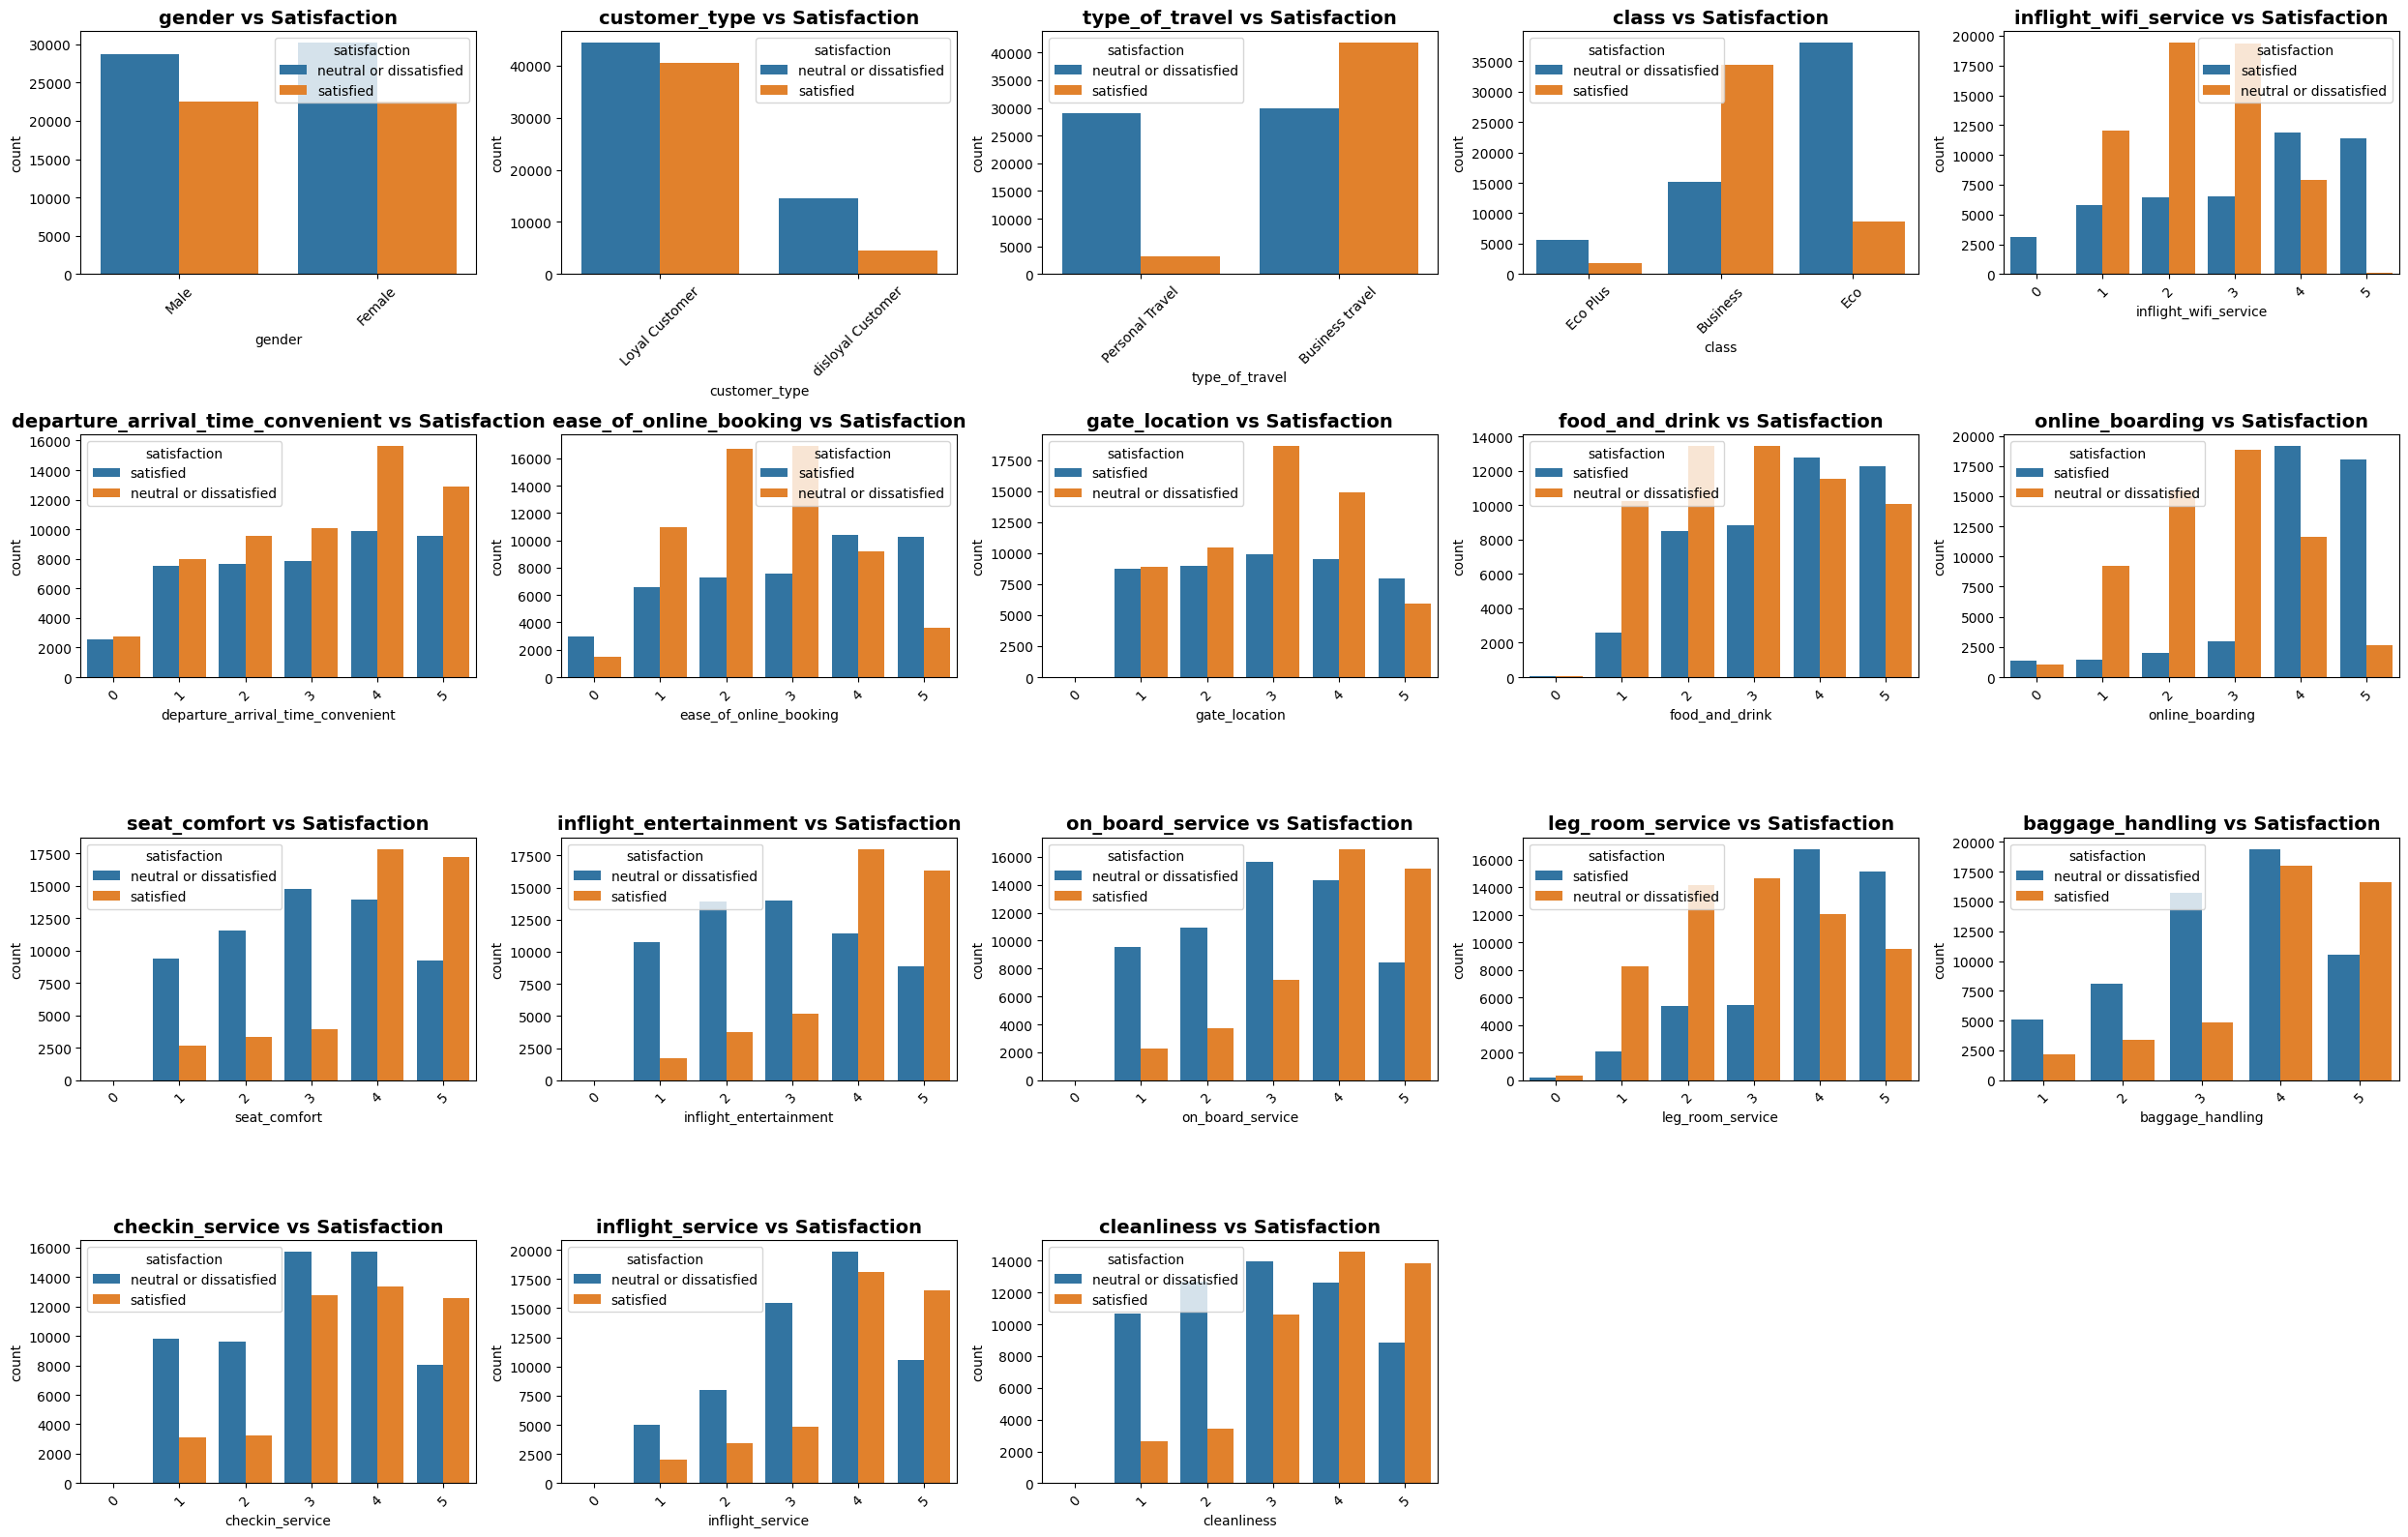

In [ ]:
cat_cols = [
    "gender", "customer_type", "type_of_travel", "class",
    "inflight_wifi_service", "departure_arrival_time_convenient",
    "ease_of_online_booking", "gate_location", "food_and_drink",
    "online_boarding", "seat_comfort", "inflight_entertainment",
    "on_board_service", "leg_room_service", "baggage_handling",
    "checkin_service", "inflight_service", "cleanliness",
    "satisfaction"
]

# loại satisfaction ra khỏi feature để không vẽ chính nó
features = [col for col in cat_cols if col != "satisfaction"]

# tạo grid subplots
n_features = len(features)
ncols = 5
nrows = (n_features + ncols - 1) // ncols  # tính số hàng đủ chứa hết features

fig, axes = plt.subplots(nrows, ncols, figsize=(25, 4 * nrows))
axes = axes.flatten()

# loop từng feature và vẽ countplot
for i, col in enumerate(features):
    sns.countplot(
        data=df,
        x=col,
        hue="satisfaction",
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs Satisfaction", fontsize=14, weight="bold")
    axes[i].tick_params(axis="x", rotation=45)

# xóa subplot trống nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


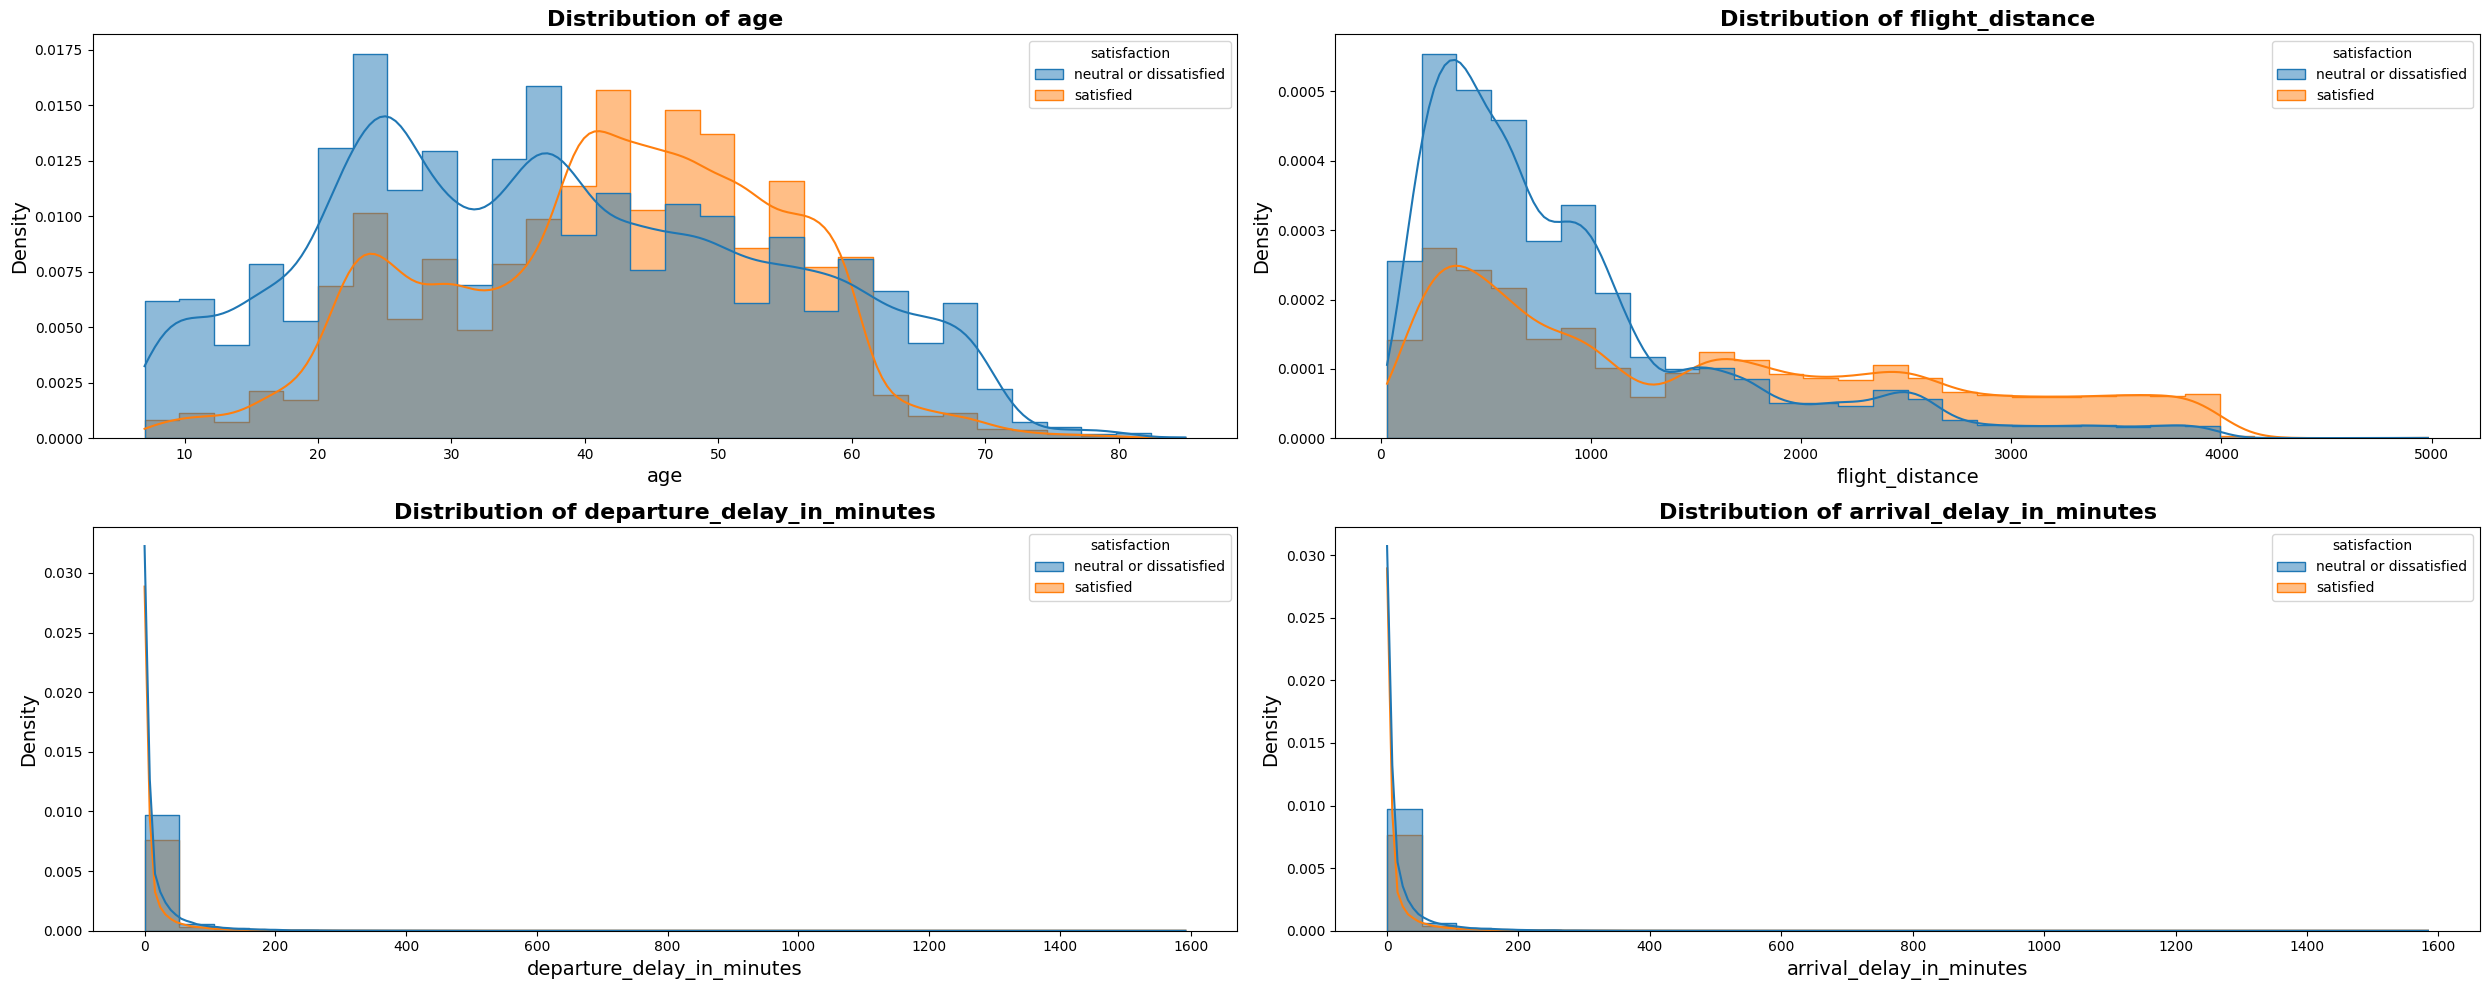

In [ ]:
cont_features = ["age", "flight_distance", "departure_delay_in_minutes", "arrival_delay_in_minutes"]

fig, axes = plt.subplots(2, 2, figsize=(25, 10))
axes = axes.flatten()

for i, col in enumerate(cont_features):
    sns.histplot(
        data=df,
        x=col,
        hue="satisfaction",
        bins=30,
        kde=True,
        stat="density",
        element="step",
        alpha=0.5,
        ax=axes[i]   # vẽ vào subplot i
    )
    axes[i].set_title(f"Distribution of {col}", fontsize=16, weight="bold")
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel("Density", fontsize=14)

# Nếu còn ô trống thì tắt
for j in range(len(cont_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



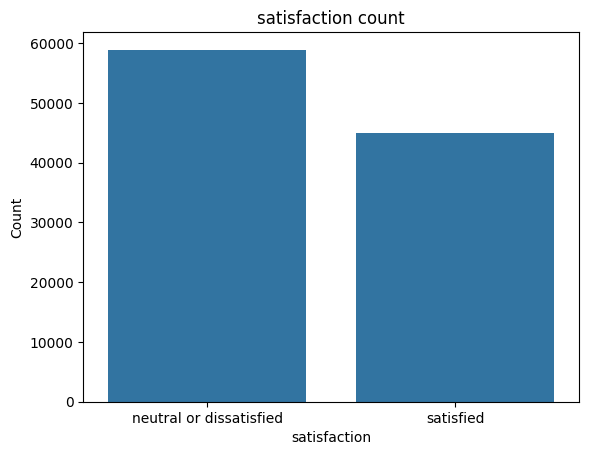

In [ ]:
sns.countplot(x='satisfaction', data=df)
plt.xlabel('satisfaction')
plt.ylabel('Count')
plt.title('satisfaction count')
plt.show()

### Preprocessing Data


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [ ]:
df.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
X = df.drop(columns='satisfaction')
y = df['satisfaction']

In [ ]:
y = y.map({"neutral or dissatisfied": 0, "satisfied": 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [23]:
# Định nghĩa cột
cat_onehot = [
    "class", "inflight_wifi_service", "departure_arrival_time_convenient",
    "ease_of_online_booking", "gate_location", "food_and_drink",
    "online_boarding", "seat_comfort", "inflight_entertainment",
    "on_board_service", "leg_room_service", "baggage_handling",
    "checkin_service", "inflight_service", "cleanliness"
]

cat_ordinal = ["gender", "customer_type", "type_of_travel"]

num_cols = ["age", "flight_distance", "departure_delay_in_minutes", "arrival_delay_in_minutes"]

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown="ignore"), cat_onehot),
        ('ordinal', OrdinalEncoder(), cat_ordinal),
        ('scaler', MinMaxScaler(), num_cols)
    ]
)

In [25]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [26]:
smn = SMOTE(random_state=99)
X_resampled, y_resampled = smn.fit_resample(X_train_transformed, y_train)

KeyboardInterrupt: 

### Tranning dữ liệu và đánh giá với mô hình

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline


#### Logistic Regression

In [ ]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=99))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Đánh giá
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

#### Decision Tree

In [ ]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=99))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Đánh giá
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

#### RandomForest

In [ ]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=99))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Đánh giá
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

#### Support Vector Machine

In [ ]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=99))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Đánh giá
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

#### KNN (K-nearest neighbors)

In [ ]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Đánh giá
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

### Tunning MODEL

In [ ]:
from sklearn.model_selection import GridSearchCV

#### Decision Tree

In [ ]:
parameters = {'criterion':['gini', 'entropy', 'log_loss']}

# Sử dụng DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=99)
# Tunning với parameters
gs_dt = GridSearchCV(dt, parameters)
# Tạo pipeline với bộ xử lý đã fit trước đó
pl_gs_dt = Pipeline([('classifier', gs_dt)])
# Huấn luyện mô hình trên dữ liệu đã được xử lý và cân bằng
pl_gs_dt.fit(X_resampled, y_resampled)

In [ ]:
# Chạy bộ xử lý trước để biến đổi dữ liệu thành số
X_test_transformed = preprocessor.fit_transform(X_test)

# print best parameter after tuning
print(pl_gs_dt.named_steps['classifier'].best_params_)

#### RandomForest

In [ ]:
# RandomForest với:
# 1) criterion là: 'gini', 'entropy', 'log_loss'
# 2) n_estimators là: 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 150
parameters = {'criterion':['gini', 'entropy', 'log_loss'],
              'n_estimators': [90, 120, 150]}

# Sử dụng RandomForest
rf = RandomForestClassifier(random_state=99)
# Tunning với parameters
gs_rf = GridSearchCV(rf, parameters)
# Tạo pipeline với bộ xử lý đã fit trước đó
pl_gs_rf = Pipeline([('classifier', gs_rf)])
# Huấn luyện mô hình trên dữ liệu đã được xử lý và cân bằng
pl_gs_rf.fit(X_resampled, y_resampled)

In [ ]:
# Chạy bộ xử lý trước để biến đổi dữ liệu thành số
X_test_transformed = preprocessor.fit_transform(X_test)

# print best parameter after tuning
print(pl_gs_rf.named_steps['classifier'].best_params_)

#### Support Vector Machine

In [ ]:
# # Support Vector Machine với:
# # 1) kernel: rbf
# # 2) C là: 0.001, 0.01, 0.1, 1.0, 10, 100
# # 3) gamma là: 'scale', 0.001, 0.01, 0.1, 1.
# parameters = { 'kernel': ['rbf'],
#                'C': [0.01, 0.1, 1.0, 10],
#                'gamma': ['scale', 0.01, 0.1]
#               }

# # Sử dụng Support Vector Machine
# svm = SVC(random_state=99)
# # Tunning với parameters
# gs_smv = GridSearchCV(svm, parameters)

# # Tạo pipeline với bộ xử lý đã fit trước đó
# pl_gs_smv = Pipeline([('classifier', gs_smv)])

# # Huấn luyện mô hình trên dữ liệu đã được xử lý và cân bằng
# pl_gs_smv.fit(X_resampled, y_resampled)

In [ ]:
# # Chạy bộ xử lý trước để biến đổi dữ liệu thành số
# X_test_transformed = preprocessor.fit_transform(X_test)

# # print best parameter after tuning
# print(pl_gs_smv.named_steps['classifier'].best_params_)

# # print classification report
# grid_predictions = pl_gs_smv.predict(X_test_transformed)

#### KNN (K-nearest neighbors)

In [ ]:
# KNN với: n_neighbors cho chạy từ: 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33
parameters = {'n_neighbors': [13, 15, 17, 19, 21, 23, 25]}

# Sử dụng Support Vector Machine
knn = KNeighborsClassifier()
# Tunning với parameters
gs_knn = GridSearchCV(knn, parameters)

# Tạo pipeline với bộ xử lý đã fit trước đó
pl_gs_knn = Pipeline([('classifier', gs_knn)])

# Huấn luyện mô hình trên dữ liệu đã được xử lý và cân bằng
pl_gs_knn.fit(X_resampled, y_resampled)

In [ ]:
# Chạy bộ xử lý trước để biến đổi dữ liệu thành số
X_test_transformed = preprocessor.fit_transform(X_test)

# print best parameter after tuning
print(pl_gs_knn.named_steps['classifier'].best_params_)


### Chạy qua một loạt giải thuật và in ra các thông tin đánh giá mô hình

In [ ]:
import time

In [ ]:
# Tạo lis mô hình default
lr = LogisticRegression(random_state=99)
dt = DecisionTreeClassifier(random_state=99)
rf = RandomForestClassifier(random_state=99)
svm = SVC(random_state=99)
knn = KNeighborsClassifier()

# Tạo list mô hình training đã được tunning
tn_dt = DecisionTreeClassifier(criterion='entropy', random_state=99)
tn_rf = RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=99)
tn_knn = KNeighborsClassifier(n_neighbors=13)



modelList = {# Mô hình ở dạng default
             "LogisticRegression Basic": lr,
             "DecisionTree Basic": dt,
             "RandomForest Basic": rf,
             "SVM Basic": svm,
             "KNN Basic": knn,
             # Mô hình đã được tunning tham số
             "DecisionTree Tunning": tn_dt,
             "RandomForest Tunning": tn_rf,
            #  "SVM Tunning": tn_svm,
             "KNN Tunning": tn_knn
             }

In [ ]:
# Sau khi split dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(), cat_onehot),
    ('num', MinMaxScaler(), num_cols),
    ('ordinal', OrdinalEncoder(), cat_ordinal)
])

# Vòng lặp train nhiều model
model_results = []
for name_md, model in modelList.items():
    print(f"Running model {name_md}")

    pl_model = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    pl_model.fit(X_train, y_train)
    y_pred = pl_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    result = {
        "model": name_md,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }
    model_results.append(result)

In [ ]:
df_results = pd.DataFrame(model_results)
df_results

=> Nên chọn Random Forest F1 = 0.9555, cao nhất bảng → phù hợp cho bài toán cần cân bằng Precision và Recal